Introduction [of dataset]:

The dataset consists of the countrywide car accidents in USA which includes data from all 49 states. 
Several APIs[Application programming interface] that offer streaming traffic incident (or event) data were used 
to gather the accident data, which covered the period from February 2016 to December 2021. These APIs disseminate 
traffic information that has been gathered by a number of organisations, including the US and state departments 
of transportation, law enforcement organisations, traffic cameras, and traffic sensors embedded in road networks.


<div class="alert alert-block alert-warning""> Required Libraries </div>

In [5]:
!pip install Beautifuk


     ---------------------------------------- 3.4/3.4 MB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for lxml: started
  Running setup.py install for lxml: finished with status 'error'


  DEPRECATION: lxml is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  Running setup.py install for lxml did not run successfully.
  exit code: 1
  
  [76 lines of output]
  Building lxml version 4.9.1.
  Building without Cython.
  Building against pre-built libxml2 andl libxslt libraries
  running install
  C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-31

In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import datetime
import pickle

<div class="alert alert-block alert-warning""> Importing the dataset </div>

In [2]:
df=pd.read_csv("US_Accidents_Dec21_updated.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,Fa

Columns:

1.Severity
=>The 'severity' column express the impact on the traffic because of the accident which is ranged in between 1 
and 4.


2.Start time
=>This column shows the start time of the accident in local time zone.


3.End time
=>This column shows the end time of the accident in local time zone. End time here refers to the moment at which 
the accident influence on traffic flow.


4.Distance(mi)
=>This column shows the length of the road extent affected by the accident.


5.Description
=>This column displays a description of the accident that was given by a human.


6.City
=>This column displays the exact city where the accident occurred.


7.State
=>This column displays the State where the accident occurred.


8.Weather Timestamp
=>This column shows the time-stamp of weather observation record (in local time).


9.Temperature['F]
=>This column shows the temperature in Fahrenheit.


10.Wind Chill['F]
=>This column shows the wind chill in Fahrenheit.
(Wind chill is the cooling effect of wind blowing on a surface.)


11.Humidity[%]
=>This column shows the humidity in the atmosphere in percentage.
(Humidity is the amount of water vapour in the atmosphere.)


12.Pressure[in]
=>This column shows the atmospheric pressure in inches.
(Atmospheric pressure is the pressure exerted by the weight of the atmosphere.)


13.Visibility[mi]
=>This column displays the visibility in the atmosphere and is measured in miles.
(Visibility is the measure of the distance at which an object or light can be clearly recognized.)


14.Wind Direction
=>This column displays the wind direction.
(Wind direction is the direction from which the wind is blowing.)


15.Wind speed[mph]
=>This column displays the speed of the wind in the mph(miles per hour).


16.Precipitation[in]
=>This column displays the precipitation amount in inches, if there is any.


17.Weather Condition
=>This column shows the weather condition i.e. rain, snow, thunderstorm, fog, etc.


18.Station
=>This column shows if there are any police station nearby. 


19.Traffic Signal
=>This column shows if there are traffic signal nearby or at the incident.


20.Sunrise Sunset
=>This column shows the period i.e. day or night.


21.Death
=>This column displays if the victim is dead or alive according to the severity of the accident.

<div class="alert alert-block alert-warning""> Printing all the columns </div>

In [110]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<div class="alert alert-block alert-warning""> Finding the number of null values </div>

In [111]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [112]:
drop_rows=['Precipitation(in)','Wind_Chill(F)','Number']

<div class="alert alert-block alert-warning""> Dropping rows with null values </div>

In [113]:
df.dropna(subset=drop_rows,axis=0,inplace=True)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
42,A-43,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Closed between IN-26 and IN-67 - Road closed d...,9001.0,W State Road 26,R,Dunkirk,Jay,IN,47336,US,US/Eastern,KMIE,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
43,A-44,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Closed between IN-67 and IN-26 - Road closed d...,473.0,N Meridian St,R,Redkey,Jay,IN,47373-9430,US,US/Eastern,KMIE,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
47,A-48,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Closed between Willshire and US-33/Rockford Rd...,12998.0,State Route 49,R,Willshire,Van Wert,OH,45898-9523,US,US/Eastern,KFWA,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
50,A-51,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Between Irish Rd and Blystone Rd - Accident.,25529.0,Highway 99,L,Cambridge Springs,Crawford,PA,16403,US,US/Eastern,KGKJ,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
66,A-67,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,At I-490/Exit 161 - Accident.,3937.0,Iron Ct,L,Cleveland,Cuyahoga,OH,44115,US,US/Eastern,KBKL,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845298,A-2845299,3,2019-08-23 16:19:21,2019-08-23 16:48:04,37.609816,-122.493720,37.608821,-122.495261,0.109,At Fassler Ave/Rockaway Beach Ave - Accident. ...,895.0,San Marlo Way,R,Pacifica,San Mateo,CA,94044,US,US/Pacific,KSFO,2019-08-23 15:56:00,78.0,78.0,54.0,29.77,10.0,NNE,7.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845302,A-2845303,4,2019-08-23 17:25:12,2019-08-23 17:54:00,38.995930,-121.672020,39.003170,-121.662679,0.708,Closed between Yuba City and CA-99/Sawtelle Av...,3044.0,Thompson Rd,R,Yuba City,Sutter,CA,95993-9744,US,US/Pacific,KMYV,2019-08-23 17:53:00,98.0,98.0,23.0,29.62,10.0,S,8.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845303,A-2845304,4,2019-08-23 17:25:12,2019-08-23 17:54:00,39.003170,-121.662679,38.995930,-121.672020,0.708,Closed between CA-99/Sawtelle Ave and Yuba Cit...,2500.0,Tudor Rd,R,Yuba City,Sutter,CA,95993-9513,US,US/Pacific,KMYV,2019-08-23 17:53:00,98.0,98.0,23.0,29.62,10.0,S,8.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845304,A-2845305,3,2019-08-23 01:16:01,2019-08-23 01:44:53,34.121320,-117.254540,34.121320,-117.254540,0.000,At San Bernardino - Accident.,1498.0,E Base Line St,L,San Bernardino,San Bernardino,CA,92410-4114,US,US/Pacific,KSB

In [114]:
df['Weather_Timestamp'].str[:4].value_counts()

2021    676371
2020    221298
2019     50092
2018      2266
2017      1618
2016       702
Name: Weather_Timestamp, dtype: int64

<div class="alert alert-block alert-warning""> Plotting a scatter plot to get an idea of the spread of number of accidents in the whole country. </div>

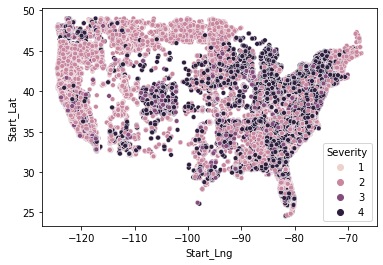

In [115]:
sns.scatterplot(x='Start_Lng',y='Start_Lat',data=df,hue='Severity',s=22);

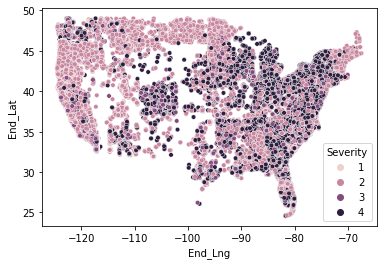

In [116]:
sns.scatterplot(x='End_Lng',y='End_Lat',data=df,hue='Severity',s=20);

In [117]:
df['Timezone'].value_counts()

US/Eastern     474070
US/Pacific     275913
US/Central     154229
US/Mountain     48135
Name: Timezone, dtype: int64

<div class="alert alert-block alert-warning""> Extracting the important part from the whole dataset </div>

In [118]:
dff=df[df['Timezone']=='US/Eastern']
dff

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
42,A-43,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Closed between IN-26 and IN-67 - Road closed d...,9001.0,W State Road 26,R,Dunkirk,Jay,IN,47336,US,US/Eastern,KMIE,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
43,A-44,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Closed between IN-67 and IN-26 - Road closed d...,473.0,N Meridian St,R,Redkey,Jay,IN,47373-9430,US,US/Eastern,KMIE,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
47,A-48,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Closed between Willshire and US-33/Rockford Rd...,12998.0,State Route 49,R,Willshire,Van Wert,OH,45898-9523,US,US/Eastern,KFWA,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
50,A-51,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Between Irish Rd and Blystone Rd - Accident.,25529.0,Highway 99,L,Cambridge Springs,Crawford,PA,16403,US,US/Eastern,KGKJ,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
66,A-67,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,At I-490/Exit 161 - Accident.,3937.0,Iron Ct,L,Cleveland,Cuyahoga,OH,44115,US,US/Eastern,KBKL,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844988,A-2844989,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,At Wake Forest - Accident. Right lane blocked.,12420.0,Capital Blvd,R,Wake Forest,Wake,NC,27587-9551,US,US/Eastern,KLHZ,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2844991,A-2844992,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Closed at Bob White Rd - Road closed due to ac...,14001.0,Darden Farm Ln,R,Smithfield,Isle of Wight,VA,23430-7547,US,US/Eastern,KFAF,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2844992,A-2844993,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Closed at Darden Farm Ln - Road closed due to ...,16000.0,Bob White Rd,L,Smithfield,Isle of Wight,VA,23430-7555,US,US/Eastern,KFAF,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2844996,A-2844997,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Ramp to SR-826/Florida's Tpke/R Reagan Tpke - ...,16646.0,NW 7th Ave,L,Miami,Miami-Dade,FL,33169-581

In [119]:
dff.reset_index(drop=True,inplace=True)
dff

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-43,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Closed between IN-26 and IN-67 - Road closed d...,9001.0,W State Road 26,R,Dunkirk,Jay,IN,47336,US,US/Eastern,KMIE,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
1,A-44,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Closed between IN-67 and IN-26 - Road closed d...,473.0,N Meridian St,R,Redkey,Jay,IN,47373-9430,US,US/Eastern,KMIE,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2,A-48,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Closed between Willshire and US-33/Rockford Rd...,12998.0,State Route 49,R,Willshire,Van Wert,OH,45898-9523,US,US/Eastern,KFWA,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-51,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Between Irish Rd and Blystone Rd - Accident.,25529.0,Highway 99,L,Cambridge Springs,Crawford,PA,16403,US,US/Eastern,KGKJ,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-67,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,At I-490/Exit 161 - Accident.,3937.0,Iron Ct,L,Cleveland,Cuyahoga,OH,44115,US,US/Eastern,KBKL,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474065,A-2844989,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,At Wake Forest - Accident. Right lane blocked.,12420.0,Capital Blvd,R,Wake Forest,Wake,NC,27587-9551,US,US/Eastern,KLHZ,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
474066,A-2844992,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Closed at Bob White Rd - Road closed due to ac...,14001.0,Darden Farm Ln,R,Smithfield,Isle of Wight,VA,23430-7547,US,US/Eastern,KFAF,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
474067,A-2844993,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Closed at Darden Farm Ln - Road closed due to ...,16000.0,Bob White Rd,L,Smithfield,Isle of Wight,VA,23430-7555,US,US/Eastern,KFAF,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
474068,A-2844997,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Ramp to SR-826/Florida's Tpke/R Reagan Tpke - ...,16646.0,NW 7th Ave,L,Miami,Miami-Dade,FL,33169-5811,US,US/E

<div class="alert alert-block alert-warning""> Finding total number of null values in the above dataset</div>

In [120]:
dff.isnull().sum()

ID                          0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                     0
End_Lng                     0
Distance(mi)                0
Description                 0
Number                      0
Street                      1
Side                        0
City                       29
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp           0
Temperature(F)              0
Wind_Chill(F)               0
Humidity(%)               667
Pressure(in)              274
Visibility(mi)           2097
Wind_Direction              1
Wind_Speed(mph)             0
Precipitation(in)           0
Weather_Condition         966
Amenity                     0
Bump                        0
Crossing                    0
Give_Way  

In [121]:
dff.set_index([[x for x in range(1,474071)]],inplace=True)

In [122]:
dff['Country'].value_counts()

US    474070
Name: Country, dtype: int64

In [123]:
dff['Timezone'].value_counts()

US/Eastern    474070
Name: Timezone, dtype: int64

<div class="alert alert-block alert-warning""> Dropping some columns </div>

In [124]:
column_to_drop=['Description','ID', 'Number','Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Amenity', 'Give_Way','Bump','Crossing', 'Street','Side','County','Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Stop', 'Traffic_Calming',
       'Turning_Loop',  'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']

In [125]:
dff.drop(column_to_drop,axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp/ipykernel_10760/1530216800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(column_to_drop,axis=1,inplace=True)


In [126]:
dff

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset
1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night
2,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night
3,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,Night
4,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,Day
5,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474066,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,Day
474067,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day
474068,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day
474069,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,10.0,NE,7.0,0.00,Fair,False,False,Night


<div class="alert alert-block alert-warning""> Exporting the dataset into new csv file </div>

In [127]:
dff.to_csv("Part_1.csv")

In [128]:
def import_csv(file_path):
    column =  []
    data = []
    col_value = False
    with open(file_path) as file:
        for element in file.readlines():
            element = element.replace("\n","")
            element = element.split(',')
            if col_value is False:
                col = element
                col_value = True
            else:
                data.append(element)
    df = pd.DataFrame(data=data, columns=col)
    return df

In [129]:
df_def=import_csv("Part_1.csv")

In [130]:
df_def

,,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset
0,1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.45112,-85.15048,40.35429,-85.14993,6.69,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.0,Light Snow,False,False,Night
1,2,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.35429,-85.14993,40.45112,-85.15048,6.69,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.0,Light Snow,False,False,Night
2,3,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.72813,-84.78965,40.74559,-84.78962,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,Night
3,4,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.83193,-80.10143000000002,41.84149,-80.11099,0.8240000000000001,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.0,Light Snow,False,False,Day
4,5,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.48339,-81.66297,41.47692,-81.66075,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.0,Light Snow,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474065,474066,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.98533,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.0,Fair,False,False,Day
474066,474067,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.92578,-76.688327,36.923484,-76.68910799999998,0.1639999999999999,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.0,Light Rain,False,False,Day
474067,474068,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.68910799999998,36.92578,-76.688327,0.1639999999999999,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.0,Light Rain,False,False,Day
474068,474069,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.0,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,10.0,NE,7.0,0.0,Fair,False,False,Night


<div class="alert alert-block alert-warning""> Numpy.genfromtxt() </div>

In [131]:
df_numpy_gen = np.genfromtxt('Partt.csv', delimiter=',')

In [132]:
pd.DataFrame(df_numpy_gen)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,4.0,NaN,NaN,6.690,NaN,NaN,NaN,NaN,19.9,7.3,81.0,29.85,2.0,NaN,12.7,0.00,NaN,NaN,NaN,NaN,NaN
2,2.0,4.0,NaN,NaN,6.690,NaN,NaN,NaN,NaN,19.9,7.3,81.0,29.85,2.0,NaN,12.7,0.00,NaN,NaN,NaN,NaN,NaN
3,3.0,4.0,NaN,NaN,1.206,NaN,NaN,NaN,NaN,17.1,0.6,77.0,29.91,2.5,NaN,19.6,0.01,NaN,NaN,NaN,NaN,NaN
4,4.0,2.0,NaN,NaN,0.824,NaN,NaN,NaN,NaN,21.0,9.9,85.0,29.69,1.0,NaN,10.4,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,918.0,2.0,NaN,NaN,0.132,NaN,NaN,NaN,NaN,81.0,81.0,54.0,29.85,10.0,NaN,13.0,0.00,NaN,NaN,NaN,NaN,NaN
919,919.0,2.0,NaN,NaN,0.007,NaN,NaN,NaN,NaN,38.0,38.0,91.0,29.85,10.0,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN
920,920.0,2.0,NaN,NaN,0.257,NaN,NaN,NaN,NaN,65.0,65.0,75.0,30.01,10.0,NaN,7.0,0.00,NaN,NaN,NaN,NaN,NaN
921,921.0,2.0,NaN,NaN,0.274,NaN,NaN,NaN,NaN,79.0,79.0,74.0,29.71,10.0,NaN,10.0,0.00,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-warning""> Pickle Method</div>

In [133]:
with open('test.pkl','wb') as f:
    pickle.dump(df, f)
with open("test.pkl", "rb") as f:
    df = pickle.load(f)

df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
42,A-43,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Closed between IN-26 and IN-67 - Road closed d...,9001.0,W State Road 26,R,Dunkirk,Jay,IN,47336,US,US/Eastern,KMIE,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
43,A-44,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Closed between IN-67 and IN-26 - Road closed d...,473.0,N Meridian St,R,Redkey,Jay,IN,47373-9430,US,US/Eastern,KMIE,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
47,A-48,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Closed between Willshire and US-33/Rockford Rd...,12998.0,State Route 49,R,Willshire,Van Wert,OH,45898-9523,US,US/Eastern,KFWA,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
50,A-51,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Between Irish Rd and Blystone Rd - Accident.,25529.0,Highway 99,L,Cambridge Springs,Crawford,PA,16403,US,US/Eastern,KGKJ,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
66,A-67,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,At I-490/Exit 161 - Accident.,3937.0,Iron Ct,L,Cleveland,Cuyahoga,OH,44115,US,US/Eastern,KBKL,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845298,A-2845299,3,2019-08-23 16:19:21,2019-08-23 16:48:04,37.609816,-122.493720,37.608821,-122.495261,0.109,At Fassler Ave/Rockaway Beach Ave - Accident. ...,895.0,San Marlo Way,R,Pacifica,San Mateo,CA,94044,US,US/Pacific,KSFO,2019-08-23 15:56:00,78.0,78.0,54.0,29.77,10.0,NNE,7.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845302,A-2845303,4,2019-08-23 17:25:12,2019-08-23 17:54:00,38.995930,-121.672020,39.003170,-121.662679,0.708,Closed between Yuba City and CA-99/Sawtelle Av...,3044.0,Thompson Rd,R,Yuba City,Sutter,CA,95993-9744,US,US/Pacific,KMYV,2019-08-23 17:53:00,98.0,98.0,23.0,29.62,10.0,S,8.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845303,A-2845304,4,2019-08-23 17:25:12,2019-08-23 17:54:00,39.003170,-121.662679,38.995930,-121.672020,0.708,Closed between CA-99/Sawtelle Ave and Yuba Cit...,2500.0,Tudor Rd,R,Yuba City,Sutter,CA,95993-9513,US,US/Pacific,KMYV,2019-08-23 17:53:00,98.0,98.0,23.0,29.62,10.0,S,8.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845304,A-2845305,3,2019-08-23 01:16:01,2019-08-23 01:44:53,34.121320,-117.254540,34.121320,-117.254540,0.000,At San Bernardino - Accident.,1498.0,E Base Line St,L,San Bernardino,San Bernardino,CA,92410-4114,US,US/Pacific,KSB

<div class="alert alert-block alert-warning""> Pd.read_csv </div>

In [134]:
df=pd.read_csv("Part_1.csv")

In [135]:
pd.set_option('display.max_columns', None)

In [136]:
df

,Unnamed: 0,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset
0,1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night
1,2,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night
2,3,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,Night
3,4,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,Day
4,5,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474065,474066,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,Day
474066,474067,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day
474067,474068,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day
474068,474069,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,10.0,NE,7.0,0.00,Fair,False,False,Night


In [137]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [138]:
#Finding number of null values
df.isnull().sum()

Severity                0
Start_Time              0
End_Time                0
Start_Lat               0
Start_Lng               0
End_Lat                 0
End_Lng                 0
Distance(mi)            0
City                   29
State                   0
Weather_Timestamp       0
Temperature(F)          0
Wind_Chill(F)           0
Humidity(%)           667
Pressure(in)          274
Visibility(mi)       2097
Wind_Direction          1
Wind_Speed(mph)         0
Precipitation(in)       0
Weather_Condition     966
Station                 0
Traffic_Signal          0
Sunrise_Sunset        499
dtype: int64

In [139]:
df.isnull()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474065,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
474066,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
474067,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
474068,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [140]:
df.isnull().sum().sum()

4533

In [141]:
#Describing the dataset
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,474070.000000,474070.000000,474070.000000,474070.000000,474070.000000,474070.000000,474070.000000,474070.000000,473403.000000,473796.000000,471973.000000,474070.000000,474070.000000
mean,2.089546,33.149273,-79.938072,33.149461,-79.937998,0.239396,66.529054,65.787445,67.947117,29.726463,9.374190,7.346266,0.005679
std,0.420793,5.914778,2.714497,5.914866,2.714453,0.479572,17.221525,18.635288,19.350128,0.445610,1.998168,5.098104,0.061023
min,1.000000,24.566027,-88.593569,24.566013,-88.594685,0.000000,-58.000000,-58.000000,1.000000,19.370000,0.000000,0.000000,0.000000
25%,2.000000,27.462376,-81.513458,27.462349,-81.513458,0.053000,55.000000,55.000000,54.000000,29.500000,10.000000,3.000000,0.000000
50%,2.000000,34.128155,-80.355719,34.129093,-80.355556,0.122000,71.000000,71.000000,68.000000,29.890000,10.000000,7.000000,0.000000
75%,2.000000,38.893127,-78.204329,38.893628,-78.202273,0.251000,80.000000,80.000000,84.000000,30.030000,10.000000,10.000000,0.000000
max,4.000000,47.290892,-67.484130,47.290029,-67.484130,40.560000,156.000000,156.000000,100.000000,56.540000,20.000000,131.000000,10.000000


In [142]:
df.describe(include="all")

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset
count,474070.000000,474070,474070,474070.000000,474070.000000,474070.000000,474070.000000,474070.000000,474041,474070,474070,474070.000000,474070.000000,473403.000000,473796.000000,471973.000000,474069,474070.000000,474070.000000,473104,474070,474070,473571
unique,NaN,340474,388583,NaN,NaN,NaN,NaN,NaN,5028,24,102337,NaN,NaN,NaN,NaN,NaN,23,NaN,NaN,74,2,2,2
top,NaN,2021-01-26 16:16:13,2021-03-02 23:59:00,NaN,NaN,NaN,NaN,NaN,Miami,FL,2021-01-26 15:53:00,NaN,NaN,NaN,NaN,NaN,CALM,NaN,NaN,Fair,False,False,Day
freq,NaN,160,22,NaN,NaN,NaN,NaN,NaN,67529,208890,424,NaN,NaN,NaN,NaN,NaN,78782,NaN,NaN,214652,441504,406706,313159
mean,2.089546,NaN,NaN,33.149273,-79.938072,33.149461,-79.937998,0.239396,NaN,NaN,NaN,66.529054,65.787445,67.947117,29.726463,9.374190,NaN,7.346266,0.005679,NaN,NaN,NaN,NaN
std,0.420793,NaN,NaN,5.914778,2.714497,5.914866,2.714453,0.479572,NaN,NaN,NaN,17.221525,18.635288,19.350128,0.445610,1.998168,NaN,5.098104,0.061023,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,24.566027,-88.593569,24.566013,-88.594685,0.000000,NaN,NaN,NaN,-58.000000,-58.000000,1.000000,19.370000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,2.000000,NaN,NaN,27.462376,-81.513458,27.462349,-81.513458,0.053000,NaN,NaN,NaN,55.000000,55.000000,54.000000,29.500000,10.000000,NaN,3.000000,0.000000,NaN,NaN,NaN,NaN
50%,2.000000,NaN,NaN,34.128155,-80.355719,34.129093,-80.355556,0.122000,NaN,NaN,NaN,71.000000,71.000000,68.000000,29.890000,10.000000,NaN,7.000000,0.000000,NaN,NaN,NaN,NaN
75%,2.000000,NaN,NaN,38.893127,-78.204329,38.893628,-78.202273,0.251000,NaN,NaN,NaN,80.000000,80.000000,84.000000,30.030000,10.000000,NaN,10.000000,0.000000,NaN,NaN,NaN,NaN


In [143]:
#Grouping number types fetures
numerics_type = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics_type)
numeric=numeric_df.columns
numeric_df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,4,40.451120,-85.150480,40.354290,-85.149930,6.690,19.9,7.3,81.0,29.85,2.0,12.7,0.00
1,4,40.354290,-85.149930,40.451120,-85.150480,6.690,19.9,7.3,81.0,29.85,2.0,12.7,0.00
2,4,40.728130,-84.789650,40.745590,-84.789620,1.206,17.1,0.6,77.0,29.91,2.5,19.6,0.01
3,2,41.831930,-80.101430,41.841490,-80.110990,0.824,21.0,9.9,85.0,29.69,1.0,10.4,0.00
4,2,41.483390,-81.662970,41.476920,-81.660750,0.462,24.1,7.1,75.0,29.82,2.0,28.8,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474065,2,35.985330,-78.536353,35.986947,-78.534459,0.154,88.0,88.0,62.0,29.56,10.0,6.0,0.00
474066,4,36.925780,-76.688327,36.923484,-76.689108,0.164,73.0,73.0,83.0,29.93,10.0,6.0,0.00
474067,4,36.923484,-76.689108,36.925780,-76.688327,0.164,73.0,73.0,83.0,29.93,10.0,6.0,0.00
474068,4,25.927371,-80.212694,25.927371,-80.212694,0.000,81.0,81.0,79.0,29.96,10.0,7.0,0.00


In [144]:
categorical_type=['object','bool']
categorical_df = df.select_dtypes(include=categorical_type)
categorical=categorical_df.columns
df[categorical]

,Start_Time,End_Time,City,State,Weather_Timestamp,Wind_Direction,Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset
0,2016-02-09 18:20:58,2016-02-10 00:20:58,Dunkirk,IN,2016-02-09 18:20:00,WNW,Light Snow,False,False,Night
1,2016-02-09 18:20:58,2016-02-10 00:20:58,Redkey,IN,2016-02-09 18:20:00,WNW,Light Snow,False,False,Night
2,2016-02-10 06:18:49,2016-02-10 12:18:49,Willshire,OH,2016-02-10 05:54:00,West,Light Snow,False,False,Night
3,2016-02-10 08:35:27,2016-02-10 14:35:27,Cambridge Springs,PA,2016-02-10 08:34:00,WSW,Light Snow,False,False,Day
4,2016-02-10 12:54:39,2016-02-10 18:54:39,Cleveland,OH,2016-02-10 12:53:00,West,Light Snow,False,False,Day
...,...,...,...,...,...,...,...,...,...,...
474065,2019-08-23 17:03:31,2019-08-23 17:30:19,Wake Forest,NC,2019-08-23 17:00:00,SW,Fair,False,False,Day
474066,2019-08-23 19:08:30,2019-08-23 19:37:17,Smithfield,VA,2019-08-23 19:06:00,NNE,Light Rain,False,False,Day
474067,2019-08-23 19:08:30,2019-08-23 19:37:17,Smithfield,VA,2019-08-23 19:06:00,NNE,Light Rain,False,False,Day
474068,2019-08-23 02:01:46,2019-08-23 02:30:39,Miami,FL,2019-08-23 01:53:00,NE,Fair,False,False,Night


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474070 entries, 0 to 474069
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           474070 non-null  int64  
 1   Start_Time         474070 non-null  object 
 2   End_Time           474070 non-null  object 
 3   Start_Lat          474070 non-null  float64
 4   Start_Lng          474070 non-null  float64
 5   End_Lat            474070 non-null  float64
 6   End_Lng            474070 non-null  float64
 7   Distance(mi)       474070 non-null  float64
 8   City               474041 non-null  object 
 9   State              474070 non-null  object 
 10  Weather_Timestamp  474070 non-null  object 
 11  Temperature(F)     474070 non-null  float64
 12  Wind_Chill(F)      474070 non-null  float64
 13  Humidity(%)        473403 non-null  float64
 14  Pressure(in)       473796 non-null  float64
 15  Visibility(mi)     471973 non-null  float64
 16  Wi

In [146]:
#Null value percentage
null_values_ratio = df.isnull().sum() / len(df)
null_values_percentage  = null_values_ratio * 100 
null_values_percentage

Severity             0.000000
Start_Time           0.000000
End_Time             0.000000
Start_Lat            0.000000
Start_Lng            0.000000
End_Lat              0.000000
End_Lng              0.000000
Distance(mi)         0.000000
City                 0.006117
State                0.000000
Weather_Timestamp    0.000000
Temperature(F)       0.000000
Wind_Chill(F)        0.000000
Humidity(%)          0.140697
Pressure(in)         0.057797
Visibility(mi)       0.442340
Wind_Direction       0.000211
Wind_Speed(mph)      0.000000
Precipitation(in)    0.000000
Weather_Condition    0.203767
Station              0.000000
Traffic_Signal       0.000000
Sunrise_Sunset       0.105259
dtype: float64

In [147]:
#Printing Percent nullvalues column wise

for column in df:
    print(column)
    p=(df[column].isnull().sum() / len(df))*100
    print("This column have ", p,"% Null values.")
    print("Dtype:" ,df[column].dtype)
    print("")
    

Severity
This column have  0.0 % Null values.
Dtype: int64

Start_Time
This column have  0.0 % Null values.
Dtype: object

End_Time
This column have  0.0 % Null values.
Dtype: object

Start_Lat
This column have  0.0 % Null values.
Dtype: float64

Start_Lng
This column have  0.0 % Null values.
Dtype: float64

End_Lat
This column have  0.0 % Null values.
Dtype: float64

End_Lng
This column have  0.0 % Null values.
Dtype: float64

Distance(mi)
This column have  0.0 % Null values.
Dtype: float64

City
This column have  0.006117240070031852 % Null values.
Dtype: object

State
This column have  0.0 % Null values.
Dtype: object

Weather_Timestamp
This column have  0.0 % Null values.
Dtype: object

Temperature(F)
This column have  0.0 % Null values.
Dtype: float64

Wind_Chill(F)
This column have  0.0 % Null values.
Dtype: float64

Humidity(%)
This column have  0.1406965216107326 % Null values.
Dtype: float64

Pressure(in)
This column have  0.05779737169616301 % Null values.
Dtype: float64

Vis

<AxesSubplot:>

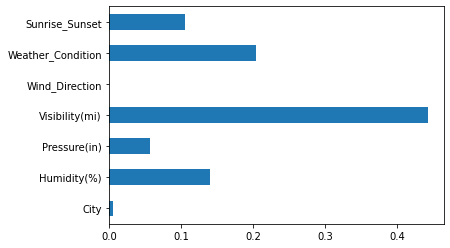

In [148]:
null_values_percentage[null_values_percentage != 0].plot(kind = "barh")

In [149]:
df['Sunrise_Sunset'].mode()

0    Day
Name: Sunrise_Sunset, dtype: object

In [150]:
df['Sunrise_Sunset'].replace(np.nan,"Day",inplace=True)

In [151]:
less_null_cols =['City','Wind_Direction']

In [152]:
df.dropna(subset=less_null_cols,axis=0,inplace=True)

In [153]:
df['Weather_Condition'].mode()

0    Fair
Name: Weather_Condition, dtype: object

In [154]:
df["Weather_Condition"].replace(np.nan,"Fair",inplace=True)

In [155]:
df["Humidity(%)"].skew()

-0.23076997312904465

In [156]:
df['Visibility(mi)'].skew()

-2.967405876472121

In [157]:
df['Pressure(in)'].skew()

-1.4609864741784895

<div class="alert alert-block alert-info""> After checking the skewness , we replaced some columns with mean/median. 
                                          
Categorical features were replaced by mode</div>

In [158]:
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(),inplace=True)

In [159]:
df['Humidity(%)'].fillna(df['Humidity(%)'].mean(),inplace=True)

In [160]:
df['Pressure(in)'].fillna(df['Pressure(in)'].mean(),inplace=True)

In [161]:
df.isnull().sum()

Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
City                 0
State                0
Weather_Timestamp    0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Station              0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

<div class="alert alert-success"">We got clean dataset without any null values</div>

In [162]:
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset
0,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night
1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night
2,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,Night
3,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,Day
4,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474065,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,Day
474066,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day
474067,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day
474068,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,10.0,NE,7.0,0.00,Fair,False,False,Night


In [163]:
df.reset_index(drop=True,inplace=True)
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset
0,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night
1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night
2,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,Night
3,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,Day
4,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474035,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,Day
474036,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day
474037,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day
474038,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,10.0,NE,7.0,0.00,Fair,False,False,Night


In [164]:
d_cat=df[categorical]

In [165]:
df['Sunrise_Sunset'].unique()

array(['Night', 'Day'], dtype=object)

<div class="alert alert-block alert-warning""> Adding week column with the help of date time lib</div>

In [166]:
import datetime
days=[]
for i in df['Weather_Timestamp'].str[:10]:
    day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    day = datetime.datetime.strptime(i, '%Y-%m-%d').weekday()
    days.append(day_name[day])

In [167]:
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset
0,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night
1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night
2,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,Night
3,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,Day
4,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474035,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,Day
474036,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day
474037,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day
474038,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,10.0,NE,7.0,0.00,Fair,False,False,Night


In [168]:
df.loc[:,'Day']=days

In [169]:
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset,Day
0,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday
1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday
2,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,Night,Wednesday
3,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,Day,Wednesday
4,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,Day,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474035,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,Day,Friday
474036,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday
474037,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday
474038,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,10.0,NE,7.0,0.00,Fair,False,False,Night,Friday


In [170]:
df['Year']=df['Weather_Timestamp'].str[:4]

In [171]:
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset,Day,Year
0,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016
1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016
2,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,Night,Wednesday,2016
3,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,Day,Wednesday,2016
4,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,Day,Wednesday,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474035,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,Day,Friday,2019
474036,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019
474037,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019
474038,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,10.0,NE,7.0,0.00,Fair,False,False,Night,Friday,2019


In [172]:
df['Date']=df['Weather_Timestamp'].str[5:10]

In [173]:
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset,Day,Year,Date
0,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016,02-09
1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016,02-09
2,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,Night,Wednesday,2016,02-10
3,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,Day,Wednesday,2016,02-10
4,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,Day,Wednesday,2016,02-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474035,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,Day,Friday,2019,08-23
474036,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019,08-23
474037,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019,08-23
474038,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,10.0,NE,7.0,0.00,Fair,False,False,Night,Friday,2019,08-23


In [174]:
df['Time']=df['Start_Time'].str[10:]

In [175]:
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset,Day,Year,Date,Time
0,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016,02-09,18:20:58
1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016,02-09,18:20:58
2,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,Night,Wednesday,2016,02-10,06:18:49
3,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,Day,Wednesday,2016,02-10,08:35:27
4,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,Day,Wednesday,2016,02-10,12:54:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474035,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,Day,Friday,2019,08-23,17:03:31
474036,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019,08-23,19:08:30
474037,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019,08-23,19:08:30
474038,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,10.0,NE,7.0,0.00,Fair,False,False,Night,Friday,2019,08-23,02:01:46


In [176]:
#converting distance in miles to distance in kms
df['Distance(km)']=df["Distance(mi)"]*1.6

In [177]:
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset,Day,Year,Date,Time,Distance(km)
0,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016,02-09,18:20:58,10.7040
1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,2.0,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016,02-09,18:20:58,10.7040
2,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,2.5,West,19.6,0.01,Light Snow,False,False,Night,Wednesday,2016,02-10,06:18:49,1.9296
3,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.0,WSW,10.4,0.00,Light Snow,False,False,Day,Wednesday,2016,02-10,08:35:27,1.3184
4,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,2.0,West,28.8,0.00,Light Snow,False,False,Day,Wednesday,2016,02-10,12:54:39,0.7392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474035,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,10.0,SW,6.0,0.00,Fair,False,False,Day,Friday,2019,08-23,17:03:31,0.2464
474036,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019,08-23,19:08:30,0.2624
474037,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,10.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019,08-23,19:08:30,0.2624
474038,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,10.0,NE,7.0,0.00,Fair,False,False,Night,Friday,2019,08-23,02:01:46,0.0000


In [178]:
#converting visibility in miles to visibility in kms 
df['Visibility(mi)']=df["Visibility(mi)"]*1.60

In [179]:
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Station,Traffic_Signal,Sunrise_Sunset,Day,Year,Date,Time,Distance(km)
0,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,3.2,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016,02-09,18:20:58,10.7040
1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,3.2,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016,02-09,18:20:58,10.7040
2,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,4.0,West,19.6,0.01,Light Snow,False,False,Night,Wednesday,2016,02-10,06:18:49,1.9296
3,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.6,WSW,10.4,0.00,Light Snow,False,False,Day,Wednesday,2016,02-10,08:35:27,1.3184
4,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,3.2,West,28.8,0.00,Light Snow,False,False,Day,Wednesday,2016,02-10,12:54:39,0.7392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474035,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,16.0,SW,6.0,0.00,Fair,False,False,Day,Friday,2019,08-23,17:03:31,0.2464
474036,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,16.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019,08-23,19:08:30,0.2624
474037,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,16.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019,08-23,19:08:30,0.2624
474038,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,16.0,NE,7.0,0.00,Fair,False,False,Night,Friday,2019,08-23,02:01:46,0.0000


In [180]:
#renaming columns
df.rename(columns = {'Visibility(mi)':'Visibility(km)'}, inplace = True)

In [181]:
df.rename(columns = {'Pressure(in)':'Atmospheric_Pressure(in)'}, inplace = True)

In [182]:
df.rename(columns = {'Station':'Police Station'}, inplace = True)

In [183]:
df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Atmospheric_Pressure(in),Visibility(km),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Police Station,Traffic_Signal,Sunrise_Sunset,Day,Year,Date,Time,Distance(km)
0,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,3.2,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016,02-09,18:20:58,10.7040
1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,3.2,WNW,12.7,0.00,Light Snow,False,False,Night,Tuesday,2016,02-09,18:20:58,10.7040
2,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,4.0,West,19.6,0.01,Light Snow,False,False,Night,Wednesday,2016,02-10,06:18:49,1.9296
3,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.6,WSW,10.4,0.00,Light Snow,False,False,Day,Wednesday,2016,02-10,08:35:27,1.3184
4,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,3.2,West,28.8,0.00,Light Snow,False,False,Day,Wednesday,2016,02-10,12:54:39,0.7392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474035,2,2019-08-23 17:03:31,2019-08-23 17:30:19,35.985330,-78.536353,35.986947,-78.534459,0.154,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,16.0,SW,6.0,0.00,Fair,False,False,Day,Friday,2019,08-23,17:03:31,0.2464
474036,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.925780,-76.688327,36.923484,-76.689108,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,16.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019,08-23,19:08:30,0.2624
474037,4,2019-08-23 19:08:30,2019-08-23 19:37:17,36.923484,-76.689108,36.925780,-76.688327,0.164,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,16.0,NNE,6.0,0.00,Light Rain,False,False,Day,Friday,2019,08-23,19:08:30,0.2624
474038,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,16.0,NE,7.0,0.00,Fair,False,False,Night,Friday,2019,08-23,02:01:46,0.0000


In [184]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 'State',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Atmospheric_Pressure(in)', 'Visibility(km)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
       'Police Station', 'Traffic_Signal', 'Sunrise_Sunset', 'Day', 'Year',
       'Date', 'Time', 'Distance(km)'],
      dtype='object')

In [185]:
new_cols = ['Severity','Date','Year','Time', 'Start_Time', 'End_Time', 'Day', 'Distance(mi)',  
        'Distance(km)', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng',
       'City', 'State', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Atmospheric_Pressure(in)', 'Visibility(km)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Police Station',
       'Traffic_Signal', 'Sunrise_Sunset']

In [186]:
#Arranging the new added columns at their proper place
df=df[new_cols]

In [187]:
df

,Severity,Date,Year,Time,Start_Time,End_Time,Day,Distance(mi),Distance(km),Start_Lat,Start_Lng,End_Lat,End_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Atmospheric_Pressure(in),Visibility(km),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Police Station,Traffic_Signal,Sunrise_Sunset
0,4,02-09,2016,18:20:58,2016-02-09 18:20:58,2016-02-10 00:20:58,Tuesday,6.690,10.7040,40.451120,-85.150480,40.354290,-85.149930,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,3.2,WNW,12.7,0.00,Light Snow,False,False,Night
1,4,02-09,2016,18:20:58,2016-02-09 18:20:58,2016-02-10 00:20:58,Tuesday,6.690,10.7040,40.354290,-85.149930,40.451120,-85.150480,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,3.2,WNW,12.7,0.00,Light Snow,False,False,Night
2,4,02-10,2016,06:18:49,2016-02-10 06:18:49,2016-02-10 12:18:49,Wednesday,1.206,1.9296,40.728130,-84.789650,40.745590,-84.789620,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,4.0,West,19.6,0.01,Light Snow,False,False,Night
3,2,02-10,2016,08:35:27,2016-02-10 08:35:27,2016-02-10 14:35:27,Wednesday,0.824,1.3184,41.831930,-80.101430,41.841490,-80.110990,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.6,WSW,10.4,0.00,Light Snow,False,False,Day
4,2,02-10,2016,12:54:39,2016-02-10 12:54:39,2016-02-10 18:54:39,Wednesday,0.462,0.7392,41.483390,-81.662970,41.476920,-81.660750,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,3.2,West,28.8,0.00,Light Snow,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474035,2,08-23,2019,17:03:31,2019-08-23 17:03:31,2019-08-23 17:30:19,Friday,0.154,0.2464,35.985330,-78.536353,35.986947,-78.534459,Wake Forest,NC,2019-08-23 17:00:00,88.0,88.0,62.0,29.56,16.0,SW,6.0,0.00,Fair,False,False,Day
474036,4,08-23,2019,19:08:30,2019-08-23 19:08:30,2019-08-23 19:37:17,Friday,0.164,0.2624,36.925780,-76.688327,36.923484,-76.689108,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,16.0,NNE,6.0,0.00,Light Rain,False,False,Day
474037,4,08-23,2019,19:08:30,2019-08-23 19:08:30,2019-08-23 19:37:17,Friday,0.164,0.2624,36.923484,-76.689108,36.925780,-76.688327,Smithfield,VA,2019-08-23 19:06:00,73.0,73.0,83.0,29.93,16.0,NNE,6.0,0.00,Light Rain,False,False,Day
474038,4,08-23,2019,02:01:46,2019-08-23 02:01:46,2019-08-23 02:30:39,Friday,0.000,0.0000,25.927371,-80.212694,25.927371,-80.212694,Miami,FL,2019-08-23 01:53:00,81.0,81.0,79.0,29.96,16.0,NE,7.0,0.00,Fair,False,False,Night


In [188]:
#sorting the values according to date and time
df=df.sort_values('Start_Time',ascending=True,kind='merge')

In [189]:
df

,Severity,Date,Year,Time,Start_Time,End_Time,Day,Distance(mi),Distance(km),Start_Lat,Start_Lng,End_Lat,End_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Atmospheric_Pressure(in),Visibility(km),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Police Station,Traffic_Signal,Sunrise_Sunset
0,4,02-09,2016,18:20:58,2016-02-09 18:20:58,2016-02-10 00:20:58,Tuesday,6.690,10.7040,40.451120,-85.150480,40.354290,-85.149930,Dunkirk,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,3.2,WNW,12.7,0.00,Light Snow,False,False,Night
1,4,02-09,2016,18:20:58,2016-02-09 18:20:58,2016-02-10 00:20:58,Tuesday,6.690,10.7040,40.354290,-85.149930,40.451120,-85.150480,Redkey,IN,2016-02-09 18:20:00,19.9,7.3,81.0,29.85,3.2,WNW,12.7,0.00,Light Snow,False,False,Night
2,4,02-10,2016,06:18:49,2016-02-10 06:18:49,2016-02-10 12:18:49,Wednesday,1.206,1.9296,40.728130,-84.789650,40.745590,-84.789620,Willshire,OH,2016-02-10 05:54:00,17.1,0.6,77.0,29.91,4.0,West,19.6,0.01,Light Snow,False,False,Night
3,2,02-10,2016,08:35:27,2016-02-10 08:35:27,2016-02-10 14:35:27,Wednesday,0.824,1.3184,41.831930,-80.101430,41.841490,-80.110990,Cambridge Springs,PA,2016-02-10 08:34:00,21.0,9.9,85.0,29.69,1.6,WSW,10.4,0.00,Light Snow,False,False,Day
4,2,02-10,2016,12:54:39,2016-02-10 12:54:39,2016-02-10 18:54:39,Wednesday,0.462,0.7392,41.483390,-81.662970,41.476920,-81.660750,Cleveland,OH,2016-02-10 12:53:00,24.1,7.1,75.0,29.82,3.2,West,28.8,0.00,Light Snow,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214263,2,12-31,2021,22:27:59,2021-12-31 22:27:59,2021-12-31 23:42:59,Friday,0.063,0.1008,37.640787,-77.443359,37.640304,-77.444346,Richmond,VA,2021-12-31 22:21:00,57.0,57.0,96.0,29.70,6.4,VAR,3.0,0.02,Cloudy,False,False,Night
127191,2,12-31,2021,22:30:29,2021-12-31 22:30:29,2021-12-31 23:50:26,Friday,0.137,0.2192,33.707135,-78.985143,33.708938,-78.986130,Myrtle Beach,SC,2021-12-31 22:20:00,63.0,63.0,100.0,29.97,0.8,S,10.0,0.00,Fog,False,False,Night
181257,2,12-31,2021,22:32:00.000000000,2021-12-31 22:32:00.000000000,2021-12-31 23:49:05.000000000,Friday,0.039,0.0624,43.164628,-77.639647,43.164628,-77.638865,Rochester,NY,2021-12-31 22:35:00,39.0,35.0,100.0,29.19,0.8,ESE,6.0,0.00,Fog,False,False,Night
244707,2,12-31,2021,22:36:00,2021-12-31 22:36:00,2021-12-31 23:55:33,Friday,0.020,0.0320,39.774884,-84.181948,39.775118,-84.182159,Dayton,OH,2021-12-31 22:26:00,61.0,61.0,77.0,28.82,16.0,SSW,13.0,0.00,Partly Cloudy,False,False,Night


In [190]:
df.reset_index(drop=True,inplace=True)

In [191]:
df['Year'].value_counts()

2021    358895
2020    105265
2019      8007
2018       800
2017       753
2016       320
Name: Year, dtype: int64

In [192]:
html_file_text= requests.get('https://www.nhtsa.gov/press-releases/traffic-fatalities-estimates-jan-sept-2021').text
#print(html_file_text)
soup=BeautifulSoup(html_file_text,'lxml')
#first_job_data=soup.find('body',class_='page-133331 node-type-article')
cname=soup.find('h1',class_='page-header--alt-heading').text
print(cname)

NHTSA Data Estimates Indicate Traffic Fatalities Continued to Rise at Record Pace in First Nine Months of 2021


In [193]:
df_2021=df[df['Year']=='2021']

In [194]:
df_2021

,Severity,Date,Year,Time,Start_Time,End_Time,Day,Distance(mi),Distance(km),Start_Lat,Start_Lng,End_Lat,End_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Atmospheric_Pressure(in),Visibility(km),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Police Station,Traffic_Signal,Sunrise_Sunset
115145,2,01-01,2021,00:00:01,2021-01-01 00:00:01,2021-01-01 01:22:27,Friday,0.026,0.0416,35.901771,-78.656364,35.901859,-78.656819,Raleigh,NC,2021-01-01 00:10:00,55.0,55.0,96.0,29.82,0.8,ENE,8.0,0.00,Light Rain,False,False,Night
115146,2,01-01,2021,00:02:47,2021-01-01 00:02:47,2021-01-01 02:07:27,Friday,0.067,0.1072,35.872965,-78.726727,35.873594,-78.727631,Raleigh,NC,2021-01-01 00:10:00,55.0,55.0,96.0,29.82,0.8,ENE,8.0,0.00,Light Rain,False,False,Night
115147,2,01-01,2021,00:03:00,2021-01-01 00:03:00,2021-01-01 01:58:31,Friday,0.151,0.2416,29.249294,-82.208855,29.247111,-82.208823,Ocala,FL,2021-01-01 00:51:00,70.0,70.0,90.0,30.04,16.0,SE,6.0,0.00,Fair,False,False,Night
115148,2,01-01,2021,00:03:12,2021-01-01 00:03:12,2021-01-01 02:23:40,Friday,0.099,0.1584,34.821132,-82.033023,34.822310,-82.032020,Woodruff,SC,2021-01-01 00:15:00,52.0,52.0,94.0,29.36,1.2,NNE,3.0,0.00,Fog,False,False,Night
115149,2,01-01,2021,00:03:16,2021-01-01 00:03:16,2021-01-01 04:08:33,Friday,1.166,1.8656,35.014522,-85.267124,34.998366,-85.273064,Chattanooga,TN,2021-01-01 00:00:00,54.0,54.0,93.0,29.37,6.4,N,6.0,0.00,Cloudy,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474035,2,12-31,2021,22:27:59,2021-12-31 22:27:59,2021-12-31 23:42:59,Friday,0.063,0.1008,37.640787,-77.443359,37.640304,-77.444346,Richmond,VA,2021-12-31 22:21:00,57.0,57.0,96.0,29.70,6.4,VAR,3.0,0.02,Cloudy,False,False,Night
474036,2,12-31,2021,22:30:29,2021-12-31 22:30:29,2021-12-31 23:50:26,Friday,0.137,0.2192,33.707135,-78.985143,33.708938,-78.986130,Myrtle Beach,SC,2021-12-31 22:20:00,63.0,63.0,100.0,29.97,0.8,S,10.0,0.00,Fog,False,False,Night
474037,2,12-31,2021,22:32:00.000000000,2021-12-31 22:32:00.000000000,2021-12-31 23:49:05.000000000,Friday,0.039,0.0624,43.164628,-77.639647,43.164628,-77.638865,Rochester,NY,2021-12-31 22:35:00,39.0,35.0,100.0,29.19,0.8,ESE,6.0,0.00,Fog,False,False,Night
474038,2,12-31,2021,22:36:00,2021-12-31 22:36:00,2021-12-31 23:55:33,Friday,0.020,0.0320,39.774884,-84.181948,39.775118,-84.182159,Dayton,OH,2021-12-31 22:26:00,61.0,61.0,77.0,28.82,16.0,SSW,13.0,0.00,Partly Cloudy,False,False,Night


In [195]:
df_2020 = df[df['Year']=='2020']
df_2020

,Severity,Date,Year,Time,Start_Time,End_Time,Day,Distance(mi),Distance(km),Start_Lat,Start_Lng,End_Lat,End_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Atmospheric_Pressure(in),Visibility(km),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Police Station,Traffic_Signal,Sunrise_Sunset
9880,2,01-01,2020,01:40:17,2020-01-01 01:40:17,2020-01-01 02:07:42,Wednesday,0.077,0.1232,38.839020,-77.421700,38.838980,-77.423130,Centreville,VA,2020-01-01 01:56:00,40.0,37.0,65.0,29.56,16.0,NNE,5.0,0.0,Mostly Cloudy,False,False,Night
9881,4,01-01,2020,04:59:02,2020-01-01 04:59:02,2020-01-01 05:27:09,Wednesday,0.396,0.6336,26.256180,-81.801360,26.250450,-81.801260,Naples,FL,2020-01-01 04:53:00,57.0,57.0,69.0,30.03,16.0,NNE,3.0,0.0,Fair,False,False,Night
9882,4,01-01,2020,05:11:47,2020-01-01 05:11:47,2020-01-01 05:41:16,Wednesday,0.259,0.4144,37.278540,-79.934450,37.282170,-79.933260,Roanoke,VA,2020-01-01 04:54:00,43.0,40.0,56.0,28.58,16.0,W,5.0,0.0,Cloudy,False,True,Night
9883,4,01-01,2020,05:11:47,2020-01-01 05:11:47,2020-01-01 05:40:03,Wednesday,3.753,6.0048,27.875280,-82.597270,27.891590,-82.538660,Saint Petersburg,FL,2020-01-01 04:53:00,60.0,60.0,69.0,30.02,16.0,N,7.0,0.0,Fair,False,False,Night
9884,4,01-01,2020,06:18:32,2020-01-01 06:18:32,2020-01-01 06:47:23,Wednesday,0.259,0.4144,37.278540,-79.934450,37.282170,-79.933260,Roanoke,VA,2020-01-01 05:54:00,43.0,35.0,56.0,28.58,16.0,WNW,18.0,0.0,Mostly Cloudy,False,True,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115140,2,12-31,2020,23:53:11,2020-12-31 23:53:11,2021-01-01 01:33:10,Thursday,0.065,0.1040,40.050812,-76.352812,40.051724,-76.352488,Lancaster,PA,2020-12-31 23:53:00,30.0,30.0,72.0,29.98,16.0,N,3.0,0.0,Fair,False,False,Night
115141,2,12-31,2020,23:54:32,2020-12-31 23:54:32,2021-01-01 03:45:00,Thursday,0.218,0.3488,38.237727,-81.542933,38.239719,-81.546047,Belle,WV,2020-12-31 23:54:00,34.0,30.0,100.0,29.24,4.8,NE,5.0,0.0,Cloudy,False,False,Night
115142,2,12-31,2020,23:56:00,2020-12-31 23:56:00,2021-01-01 02:11:39,Thursday,0.066,0.1056,34.995870,-81.998754,34.995219,-81.997890,Boiling Springs,SC,2020-12-31 23:55:00,52.0,52.0,94.0,29.35,1.6,CALM,0.0,0.0,Fog,False,False,Night
115143,2,12-31,2020,23:58:00,2020-12-31 23:58:00,2021-01-01 01:33:33,Thursday,0.024,0.0384,25.602323,-80.352543,25.601998,-80.352697,Miami,FL,2020-12-31 23:53:00,76.0,76.0,76.0,30.14,16.0,ESE,13.0,0.0,Cloudy,False,False,Night


In [196]:
#appending two sample datasets (2020 and 2021)
df_new=df_2021.append(df_2020)

C:\Users\DELL\AppData\Local\Temp/ipykernel_10760/3132896743.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new=df_2021.append(df_2020)


In [197]:
df_new

,Severity,Date,Year,Time,Start_Time,End_Time,Day,Distance(mi),Distance(km),Start_Lat,Start_Lng,End_Lat,End_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Atmospheric_Pressure(in),Visibility(km),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Police Station,Traffic_Signal,Sunrise_Sunset
115145,2,01-01,2021,00:00:01,2021-01-01 00:00:01,2021-01-01 01:22:27,Friday,0.026,0.0416,35.901771,-78.656364,35.901859,-78.656819,Raleigh,NC,2021-01-01 00:10:00,55.0,55.0,96.0,29.82,0.8,ENE,8.0,0.0,Light Rain,False,False,Night
115146,2,01-01,2021,00:02:47,2021-01-01 00:02:47,2021-01-01 02:07:27,Friday,0.067,0.1072,35.872965,-78.726727,35.873594,-78.727631,Raleigh,NC,2021-01-01 00:10:00,55.0,55.0,96.0,29.82,0.8,ENE,8.0,0.0,Light Rain,False,False,Night
115147,2,01-01,2021,00:03:00,2021-01-01 00:03:00,2021-01-01 01:58:31,Friday,0.151,0.2416,29.249294,-82.208855,29.247111,-82.208823,Ocala,FL,2021-01-01 00:51:00,70.0,70.0,90.0,30.04,16.0,SE,6.0,0.0,Fair,False,False,Night
115148,2,01-01,2021,00:03:12,2021-01-01 00:03:12,2021-01-01 02:23:40,Friday,0.099,0.1584,34.821132,-82.033023,34.822310,-82.032020,Woodruff,SC,2021-01-01 00:15:00,52.0,52.0,94.0,29.36,1.2,NNE,3.0,0.0,Fog,False,False,Night
115149,2,01-01,2021,00:03:16,2021-01-01 00:03:16,2021-01-01 04:08:33,Friday,1.166,1.8656,35.014522,-85.267124,34.998366,-85.273064,Chattanooga,TN,2021-01-01 00:00:00,54.0,54.0,93.0,29.37,6.4,N,6.0,0.0,Cloudy,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115140,2,12-31,2020,23:53:11,2020-12-31 23:53:11,2021-01-01 01:33:10,Thursday,0.065,0.1040,40.050812,-76.352812,40.051724,-76.352488,Lancaster,PA,2020-12-31 23:53:00,30.0,30.0,72.0,29.98,16.0,N,3.0,0.0,Fair,False,False,Night
115141,2,12-31,2020,23:54:32,2020-12-31 23:54:32,2021-01-01 03:45:00,Thursday,0.218,0.3488,38.237727,-81.542933,38.239719,-81.546047,Belle,WV,2020-12-31 23:54:00,34.0,30.0,100.0,29.24,4.8,NE,5.0,0.0,Cloudy,False,False,Night
115142,2,12-31,2020,23:56:00,2020-12-31 23:56:00,2021-01-01 02:11:39,Thursday,0.066,0.1056,34.995870,-81.998754,34.995219,-81.997890,Boiling Springs,SC,2020-12-31 23:55:00,52.0,52.0,94.0,29.35,1.6,CALM,0.0,0.0,Fog,False,False,Night
115143,2,12-31,2020,23:58:00,2020-12-31 23:58:00,2021-01-01 01:33:33,Thursday,0.024,0.0384,25.602323,-80.352543,25.601998,-80.352697,Miami,FL,2020-12-31 23:53:00,76.0,76.0,76.0,30.14,16.0,ESE,13.0,0.0,Cloudy,False,False,Night


In [198]:
df.to_csv("Part_2.csv")

In [199]:
df.groupby('Visibility(km)').Severity.value_counts()

Visibility(km)  Severity
0.000           2           350
                4            32
                3             4
0.096           2            16
0.160           4             6
                           ... 
25.600          2             1
32.000          2           263
                1            33
                4            30
                3            10
Name: Severity, Length: 96, dtype: int64

<div class="alert alert-block alert-info""> Visiblity insight</div>

In [200]:
df.groupby('Humidity(%)').Severity.value_counts()

Humidity(%)  Severity
1.0          2              10
2.0          2              17
3.0          2               7
             4               2
4.0          2               4
                         ...  
99.0         1               3
100.0        2           15526
             4            1067
             3             109
             1              61
Name: Severity, Length: 368, dtype: int64

<div class="alert alert-block alert-info""> Humidity insight</div>

In [201]:
df.groupby('Year').Severity.value_counts()

Year  Severity
2016  4              177
      2              112
      3               31
2017  4              471
      2              240
      3               42
2018  4              443
      2              318
      3               39
2019  4             4571
      2             2573
      3              863
2020  2            92167
      4             5668
      3             4619
      1             2811
2021  2           350398
      4             8497
Name: Severity, dtype: int64

<div class="alert alert-block alert-info"">The above plot shows the number of deaths per year</div>

In [202]:
d_cat.columns

Index(['Start_Time', 'End_Time', 'City', 'State', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Station', 'Traffic_Signal',
       'Sunrise_Sunset'],
      dtype='object')

<div class="alert alert-block alert-warning""> Encoding</div>

In [203]:
label=['Day','Weather_Condition','City','Wind_Direction', 'State', 'Police Station', 'Traffic_Signal', 'Sunrise_Sunset']

In [204]:
from sklearn.preprocessing import LabelEncoder

df[label] = df[label].apply(LabelEncoder().fit_transform)

df[label].head(20)

,Day,Weather_Condition,City,Wind_Direction,State,Police Station,Traffic_Signal,Sunrise_Sunset
0,5,39,1233,20,6,0,0,1
1,5,39,3742,20,6,0,0,1
2,6,39,4917,22,16,0,0,1
3,6,39,628,21,17,0,0,0
4,6,39,865,22,16,0,0,0
5,4,44,764,22,23,0,0,1
6,4,44,764,22,23,0,0,1
7,4,44,4066,22,17,0,0,0
8,4,44,4066,22,17,0,0,0
9,2,48,975,20,17,0,0,1


In [205]:
df.dtypes

Severity                      int64
Date                         object
Year                         object
Time                         object
Start_Time                   object
End_Time                     object
Day                           int32
Distance(mi)                float64
Distance(km)                float64
Start_Lat                   float64
Start_Lng                   float64
End_Lat                     float64
End_Lng                     float64
City                          int32
State                         int32
Weather_Timestamp            object
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Atmospheric_Pressure(in)    float64
Visibility(km)              float64
Wind_Direction                int32
Wind_Speed(mph)             float64
Precipitation(in)           float64
Weather_Condition             int32
Police Station                int64
Traffic_Signal                int64
Sunrise_Sunset              

In [206]:
df.to_csv("Part 2 Encoded.csv")